# Mall Customer Segmentation

### Goal:
Try to find patterns within the customers to better market for each specific group of customers.

## Import Module

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Load the Dataset

In [2]:
# load the data
df = pd.read_csv('Mall_Customers.csv')
df.head(6)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76


## Exploratory Data Analysis

In [3]:
# data dimension
df.shape

(200, 5)

In [4]:
# statistical info
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# datatype info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# check for missing values
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Visualizations

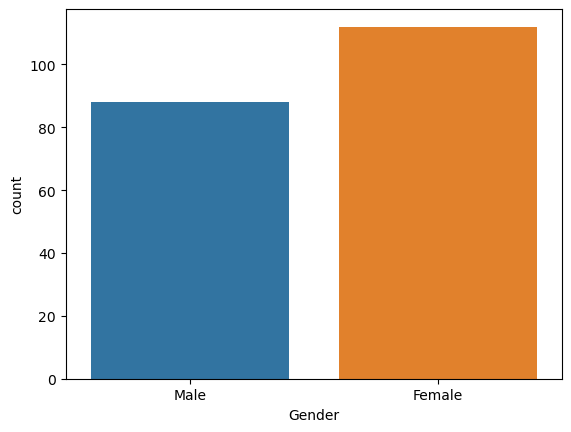

In [7]:
# count plot on gender
sns.countplot(x = df['Gender'])
plt.show()

From the count plot abve we can see we had a bit more female customers than male customers in out dataset. This makes sense since we know that Female make up a majority of the consumer in the United States.

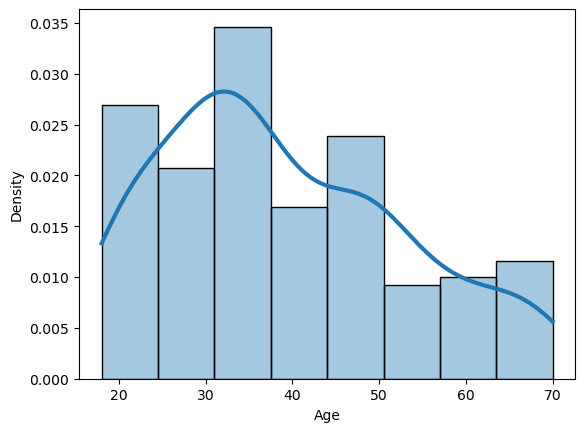

In [8]:
# histogram on Age
sns.histplot(x = df['Age'], stat = 'density',alpha = 0.4,bins = 'fd', kde = True, line_kws={"linewidth":3})
plt.show()

Majority of the customers ages ranges between 20 to 50 years old. 

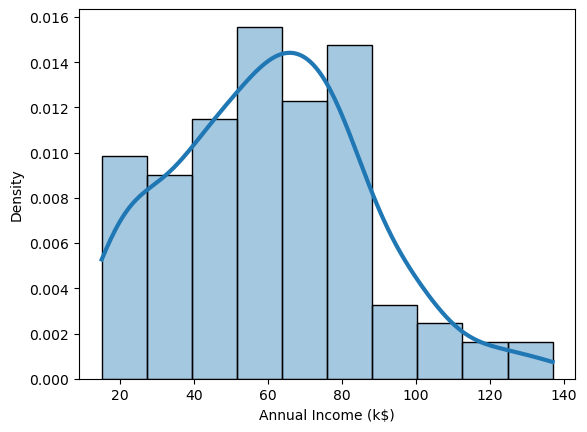

In [9]:
# histogram on Annual Income 
sns.histplot(x = df['Annual Income (k$)'], stat = 'density',alpha = 0.4,bins = 'fd', kde = True, line_kws={"linewidth":3})
plt.show()

As we can see from the histogram above that a majority of the customers income ranges between the 50,000$ to 80,000$.

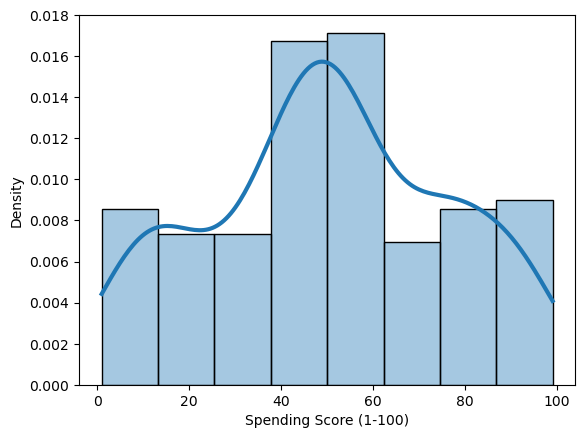

In [10]:
# histogram on Spending Score
sns.histplot(x = df['Spending Score (1-100)'], stat = 'density',alpha = 0.4,bins = 'fd', kde = True, line_kws={"linewidth":3})
plt.show()

The spending score of a good amount of customers range from 40 to 60 on a 1 to 100 scale. 

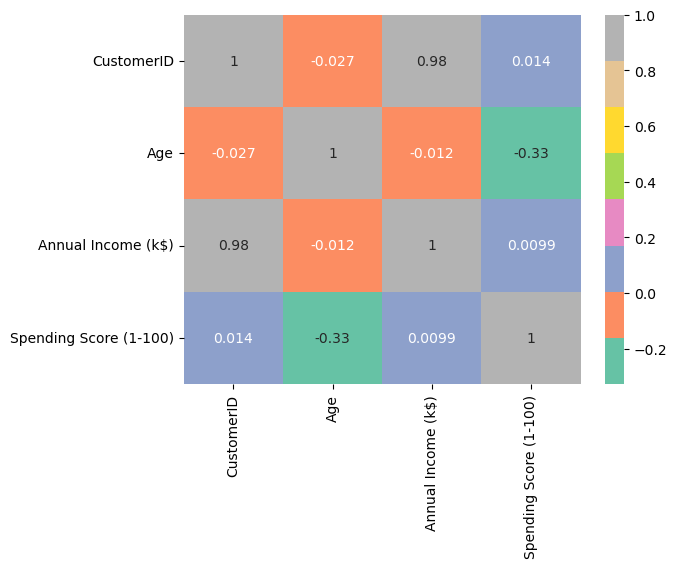

In [11]:
# correlation matrix
corr = df.corr(numeric_only = True)
sns.heatmap(corr,annot = True, cmap = 'Set2')
plt.show()

We can see there is a small correlation between spending score and age with a score of -0.33.

## Clustering 

In [40]:
# clustering on 2 features
# see if there is any patterns between annual Income and Spending score
df1 = df[['Annual Income (k$)','Spending Score (1-100)']]
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


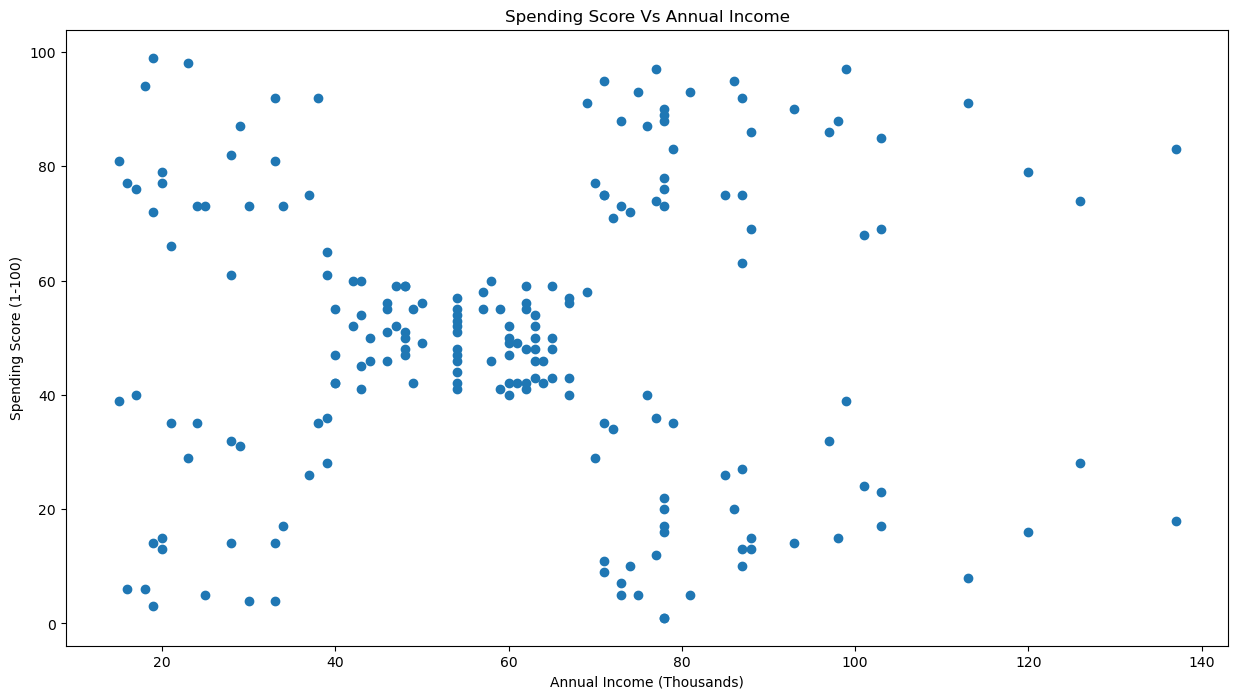

In [42]:
# scatter plot
plt.figure(figsize=(15,8))
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'])
plt.title('Spending Score Vs Annual Income')
plt.xlabel('Annual Income (Thousands)')
plt.ylabel('Spending Score (1-100)')
plt.show()

From the Scatter plot above, we can clearly see it might be optimal to cluster the points into 5 groups. There might be different ways to cluster the points. 

In [43]:
# import K Means Clustering
from sklearn.cluster import KMeans

In [44]:
# create a errors list
errors = []

df1 = df1

In [45]:
# grid search for the optimal number of cluster
# checking clustering group in the range between 1 and 11

for i in range(1,12):

    kmeans = KMeans(n_clusters = i, n_init = 'auto',random_state = 0)
    kmeans.fit(df1)
    errors.append(kmeans.inertia_)

In [46]:
# view the errors list
errors

[269981.28,
 186362.95600651755,
 106348.37306211118,
 73880.64496247195,
 44448.45544793371,
 37265.86520484346,
 31648.556137745232,
 31858.34437229437,
 26629.99350020135,
 25612.53053498434,
 19027.227817593033]

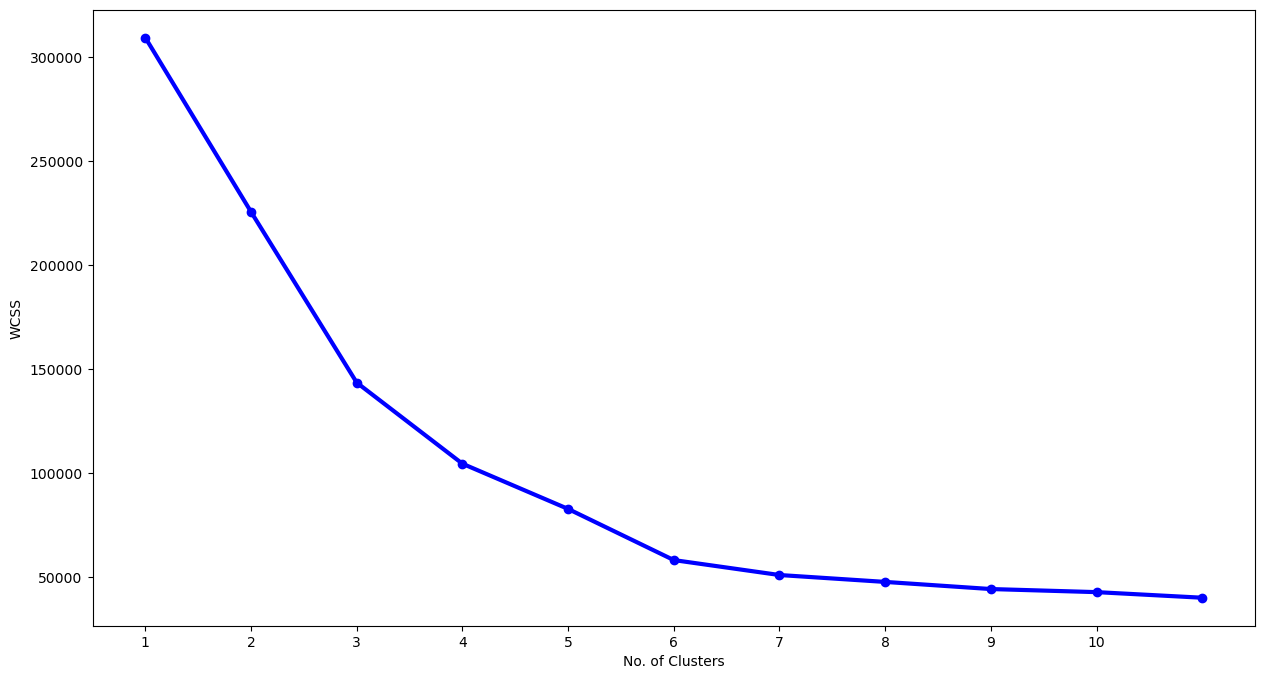

In [93]:
# plot the results for elbow method 
plt.figure(figsize = (15,8))
plt.plot(range(1,12),errors)
plt.plot(range(1,12),errors, linewidth = 3, color = 'blue',marker='o')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

WCSS is the sum of the squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1.

We choose the elbow point for the best number of clusters and to not overfit the model. The elbow on the line graph above is 5, hence the optimal number of clusters to prevent overfitting is 5.

In [48]:
# KMeans cluster with k=5
km = KMeans(n_clusters=5, n_init = 'auto', random_state = 0)
km.fit(df1)
y_pred = km.predict(df1)

print(y_pred.tolist())
len(y_pred)

[4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2]


200

In [62]:
# create a new column called Label

df_labeled = df1.copy()
df_labeled['Label'] = y_pred

# peak the new dataframe with Labels
df_labeled.head()

,Annual Income (k$),Spending Score (1-100),Label
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


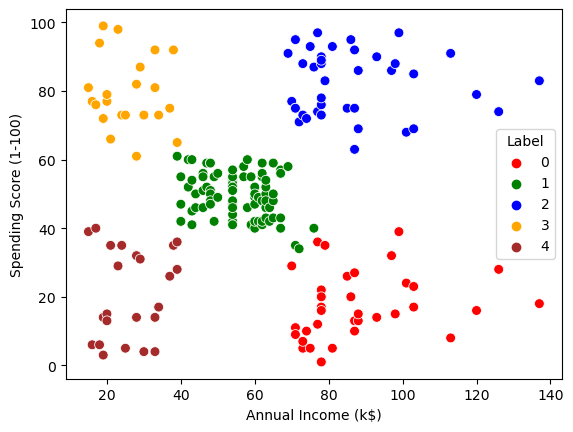

In [63]:
# scatter plot with the Labeled Clustered
sns.scatterplot(x='Annual Income (k$)', y ='Spending Score (1-100)', data = df_labeled, hue = 'Label', s=50, palette = ['red','green','blue','orange','brown'] )
plt.show()

# Clustering with 3 Features

In [64]:
# clustering on 3 features
df2 = df[['Annual Income (k$)','Spending Score (1-100)','Age']]
df2.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


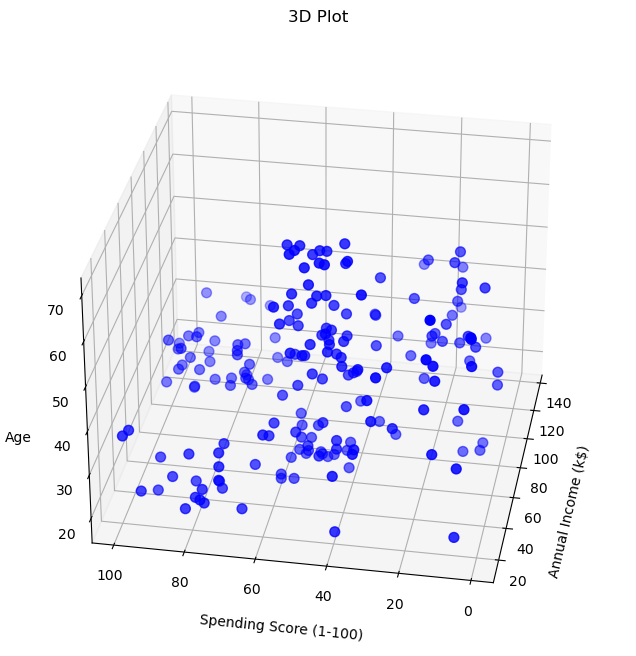

In [91]:
fig = plt.figure(figsize = (15,8))
ax = plt.axes(projection='3d')
ax.grid()

x = df2['Annual Income (k$)']
y = df2['Spending Score (1-100)']
z = df2['Age']

ax.scatter(x, y, z, c = 'b', s = 50)
ax.set_title('3D Plot')
ax.view_init(30,190)

# Set axes label
ax.set_xlabel('Annual Income (k$)', labelpad=10)
ax.set_ylabel('Spending Score (1-100)', labelpad=10)
ax.set_zlabel('Age', labelpad=10)

plt.show()

In [86]:
# grid search for the optimal number of clusters
errors = []
for i in range(1,12):
    kmeans = KMeans(n_clusters = i,n_init = 'auto', random_state = 0)
    kmeans.fit(df2)
    errors.append(kmeans.inertia_)

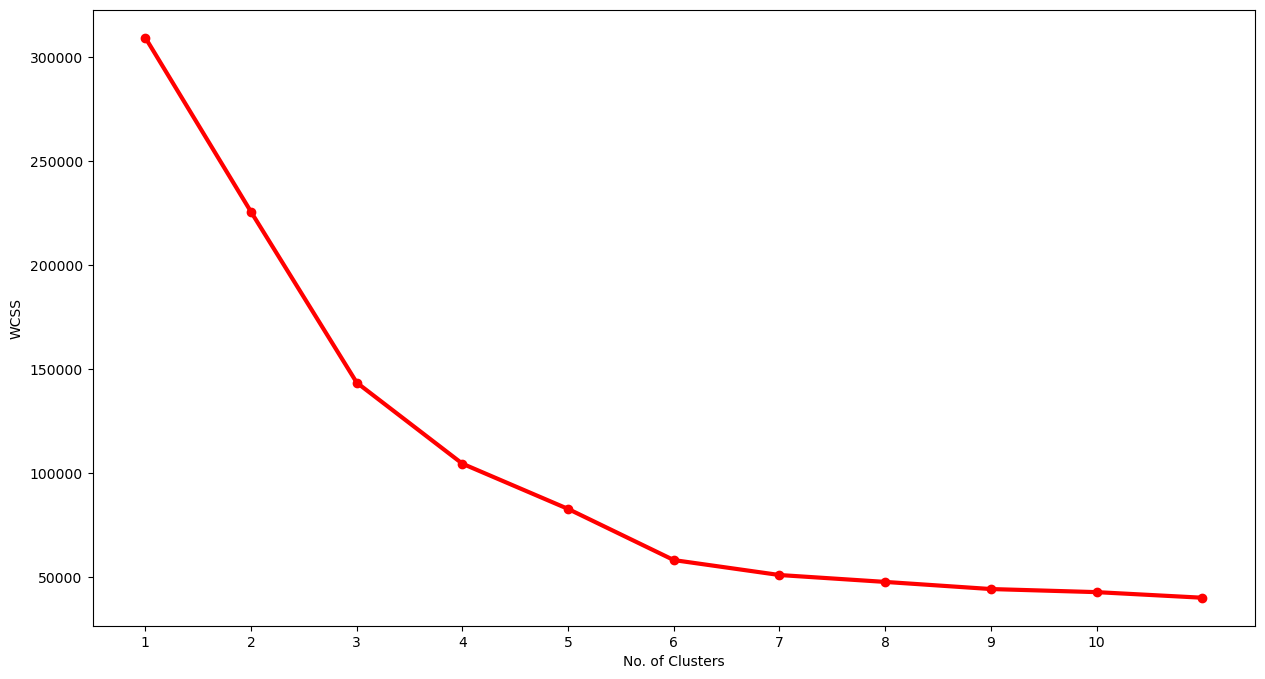

In [92]:
# WSCC
plt.figure(figsize = (15,8))
plt.plot(range(1,12),errors)
plt.plot(range(1,12),errors, linewidth = 3, color = 'red',marker='o')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

Using the elbow method on WCSS plot we can see the most optimal number of cluster we should use is 6. Any clustering after 6 would most likely overfitt the model.

In [88]:
# Kmeans clustering with k = 6
km = KMeans(n_clusters=6, n_init = 'auto', random_state = 0)
km.fit(df2)
y_pred2 = km.predict(df2)

In [89]:
# new data frame with the labels
df2_labeled = df2.copy()
df2_labeled['Label'] = y_pred2
df2_labeled.head()

,Annual Income (k$),Spending Score (1-100),Age,Label
0,15,39,19,5
1,15,81,21,3
2,16,6,20,5
3,16,77,23,3
4,17,40,31,5


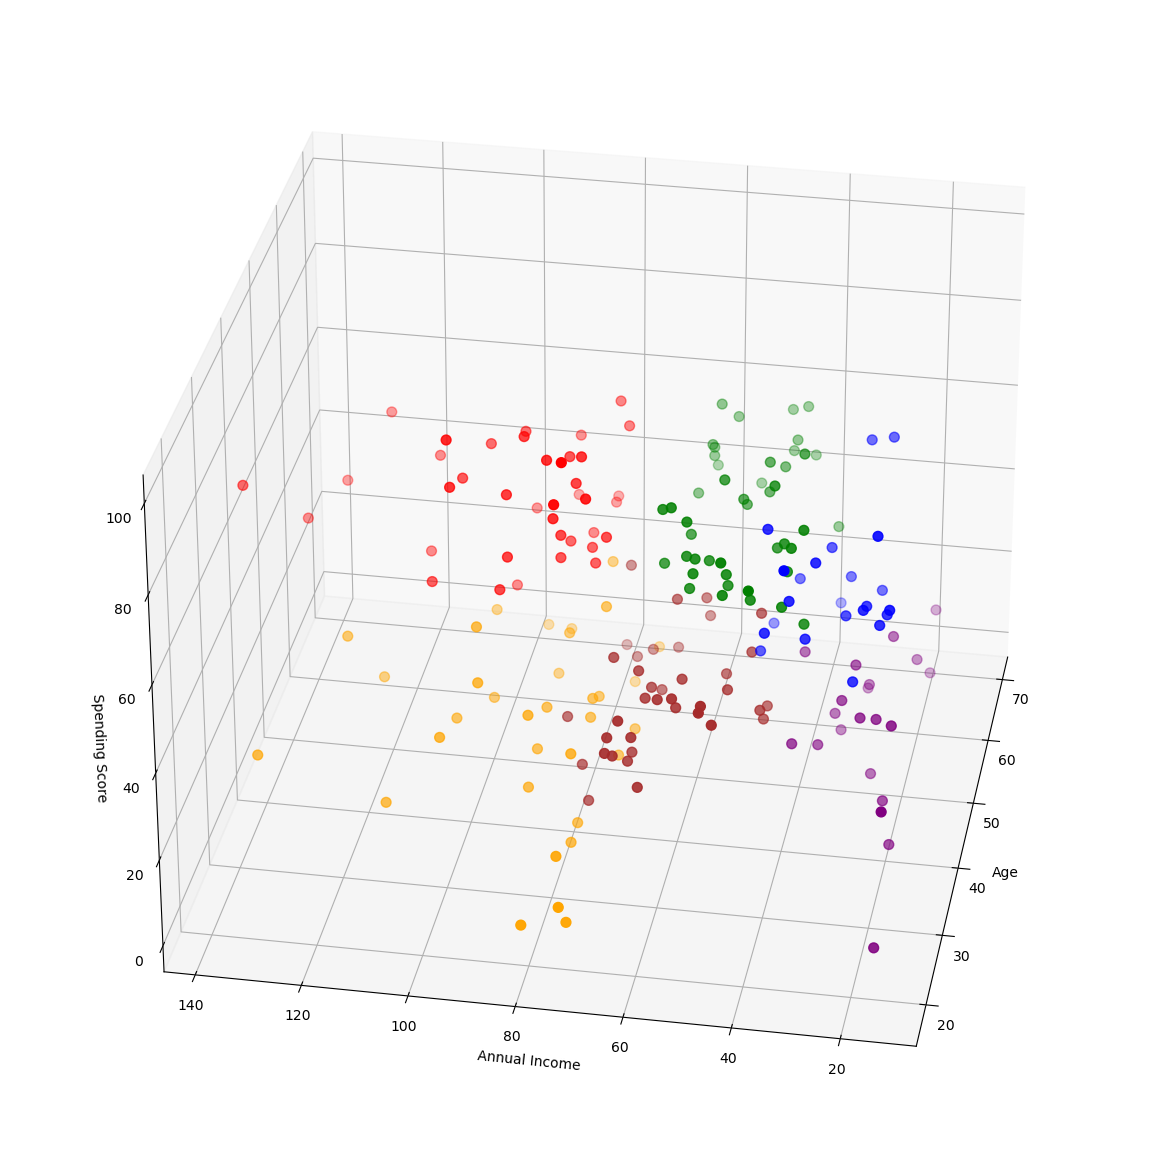

In [97]:
# 3d scatter plot
fig = plt.figure(figsize = (25,15))
ax = fig.add_subplot(111,projection = '3d')

ax.scatter(df2['Age'][df2['Label']==0], df2['Annual Income (k$)'][df2['Label']==0], df2['Spending Score (1-100)'][df2['Label']==0], c='red', s =50 )
ax.scatter(df2['Age'][df2['Label']==1], df2['Annual Income (k$)'][df2['Label']==1], df2['Spending Score (1-100)'][df2['Label']==1], c='green', s =50 )
ax.scatter(df2['Age'][df2['Label']==2], df2['Annual Income (k$)'][df2['Label']==2], df2['Spending Score (1-100)'][df2['Label']==2], c='blue', s =50 )
ax.scatter(df2['Age'][df2['Label']==3], df2['Annual Income (k$)'][df2['Label']==3], df2['Spending Score (1-100)'][df2['Label']==3], c='brown', s =50 )
ax.scatter(df2['Age'][df2['Label']==4], df2['Annual Income (k$)'][df2['Label']==4], df2['Spending Score (1-100)'][df2 ['Label']==4], c='orange', s =50 )
ax.scatter(df2['Age'][df2['Label']==5], df2['Annual Income (k$)'][df2['Label']==5], df2['Spending Score (1-100)'][df2 ['Label']==5], c='purple', s =50 )
ax.view_init(30,190)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()

Observation: After adding another predictor into our model, age, our model WCSS plot suggested it was best to add another cluster from 5 to 6. Viewing the 3D plot above we can see the clustering seems reasonable where each cluster represents a group of customers which the retailer can target to market specifically. In our dataset, we are not provided any information about the customers item purchases otherwise we can use that to target each group of customers accordingly. For now, we only grouped the customers based on annual income, spending score, and age. 

In [99]:
# take a closer look at the first to try to find any patterns with the customers
df2_cluster1 = df2_labeled.loc[df2_labeled['Label'] == 0]
df2_cluster1

,Annual Income (k$),Spending Score (1-100),Age,Label
126,71,35,43,0
128,71,11,59,0
130,71,9,47,0
134,73,5,20,0
136,73,7,44,0
138,74,10,19,0
140,75,5,57,0
144,77,12,25,0
146,77,36,48,0
148,78,22,34,0


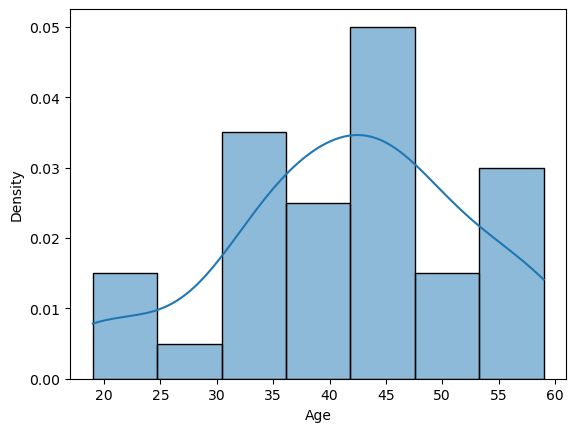

In [102]:
# histogram of Age on the first cluster
sns.histplot(x = df2_cluster1['Age'], stat = 'density', kde = True, alpha = 0.5)
plt.show()

We can see in the first cluster a majority of the customers are between the ages 30 to 45. 

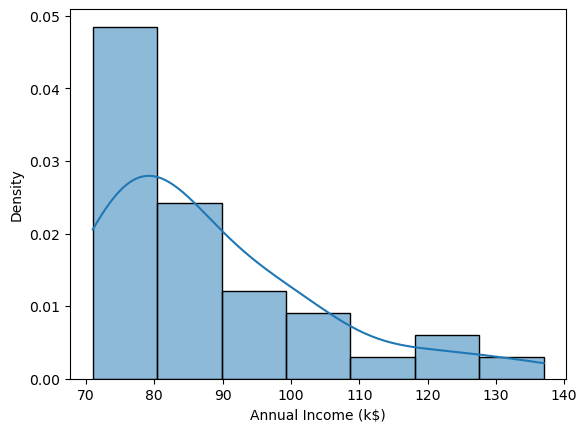

In [103]:
# histogram of Annual Income on the first cluster of customers
sns.histplot(x = df2_cluster1['Annual Income (k$)'], stat = 'density', kde = True, alpha = 0.5)
plt.show()

Here we can observe that the first cluster of customers are high earners, where the lower end of customers in this group make atleast 70k per year and the top earner in this group makes about 140k per year. 

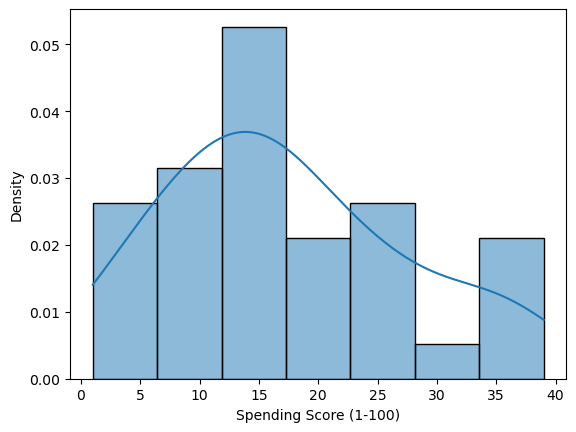

In [104]:
# histogram of Annual Income on the first cluster of customers
sns.histplot(x = df2_cluster1['Spending Score (1-100)'], stat = 'density', kde = True, alpha = 0.5)
plt.show()

After putting the pieces together we can see that the first cluster of customers which composes of high earners in the 70 to 120 thousand dollar income range and fall between the ages of 30 to 50 have a relatively low spending scores. If I was a marketer I would try to look more into this and try to appeases this specific customer group since these customers have real good annual income and their age range suggests other factors of their spending. 